In [1]:
import pandas as pd
import numpy as np
import re

log_file = "/home/charles/panda/catkin_ws/src/move_chess_panda/scripts/logs/robot_0911.txt"
# Read the log file and remove duplicated lines

with open(log_file, "r") as f:
    log_content = f.read()

# Removing duplicated lines
log_content = "\n".join(list(dict.fromkeys(log_content.split("\n"))))

# Extract fields using regex
pattern = r"move: (\S+); execution time: (\S+); capture_time: (\S+); pick_time: (\S+); place_time: (\S+); castling_time: (\S+);"
matches = re.findall(pattern, log_content)

# Convert matches to dataframe
df_robo = pd.DataFrame(matches, columns=['move', 'execution_time', 'capture_time', 'pick_time', 'place_time', 'castling_time'])

# Convert string columns to appropriate datatypes
df_robo['execution_time'] = df_robo['execution_time'].astype(float)
df_robo['capture_time'] = df_robo['capture_time'].astype(float)
df_robo['pick_time'] = df_robo['pick_time'].astype(float)
df_robo['place_time'] = np.nan
df_robo['castling_time'] = df_robo['castling_time'].astype(float)
df_robo.replace(0, np.nan, inplace=True)
df_robo['place_time'] = df_robo['execution_time'] - df_robo['pick_time'].fillna(0) - df_robo['capture_time'].fillna(0) - df_robo['castling_time'].fillna(0)
df_robo

,move,execution_time,capture_time,pick_time,place_time,castling_time
0,d2d400000,6.333890,NaN,3.434027,2.899863,NaN
1,c2c400000,6.167518,NaN,3.343119,2.824399,NaN
2,g2g300000,6.200863,NaN,3.481520,2.719344,NaN
3,c1d200000,5.900636,NaN,3.305456,2.595180,NaN
4,f1g200000,5.934322,NaN,3.202067,2.732255,NaN
5,g1f310000,8.024098,NaN,3.320578,4.703520,NaN
6,e1g100100,13.501014,NaN,3.129974,3.004167,7.366873
7,d1c200000,5.900811,NaN,3.092285,2.808526,NaN
8,d2f400000,5.967550,NaN,3.092325,2.875225,NaN
9,f1d100000,6.157443,NaN,3.286971,2.870472,NaN


In [2]:
hop = 0
capture = 0
castling = 0
for move in df_robo['move']:
    if move[4] == '1':
        hop += 1
    if move[5] == '1':
        capture += 1
    if move[6] == '1':
        castling += 1
hop, capture, castling

(7, 7, 1)

In [7]:
['execution time', 'capture time', 'pick time', 'place time', 'castling time']

Index(['execution_time', 'capture_time', 'pick_time', 'place_time',
       'castling_time'],
      dtype='object')

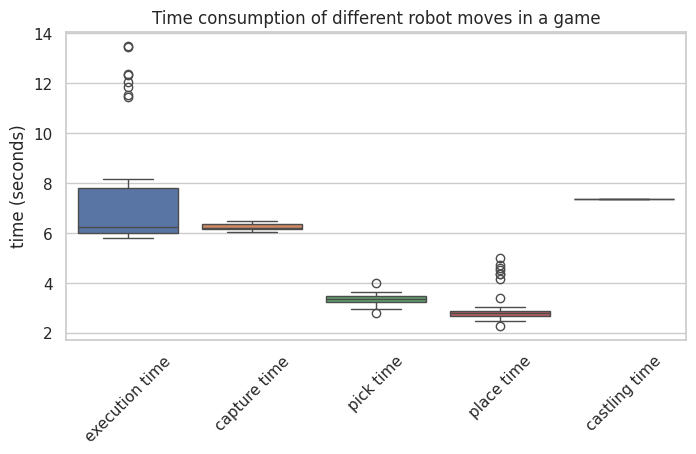

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot statistics for numeric columns
numeric_cols = df_robo.select_dtypes(include=[np.number])
numeric_cols.columns = ['execution time', 'capture time', 'pick time', 'place time', 'castling time']

# Summary statistics
sns.set(style="whitegrid")
plt.figure(figsize=(8, 4))
sns.boxplot(data=numeric_cols, showfliers = True)
plt.title("Time consumption of different robot moves in a game")
plt.xticks(rotation=45)
plt.ylabel("time (seconds)")
plt.show()

In [17]:
mean_values = numeric_cols.mean()
median_values = numeric_cols.median()
mean_values, median_values

(execution_time    7.349217
 capture_time      6.241780
 pick_time         3.342047
 place_time        2.985983
 castling_time     7.366873
 dtype: float64,
 execution_time    6.212443
 capture_time      6.186646
 pick_time         3.364449
 place_time        2.774051
 castling_time     7.366873
 dtype: float64)

In [11]:
import pandas as pd
import numpy as np
import re

log_file = "/home/charles/panda/catkin_ws/src/move_chess_panda/scripts/logs/interaction_0911.txt"
# Read the log file and remove duplicated lines

with open(log_file, "r") as f:
    log_content = f.read()

# Removing duplicated lines
log_content = "\n".join(list(dict.fromkeys(log_content.split("\n"))))

# turn: False, move: d2d4; score: 45; evaluation: ; detect_time: 0; evaluate_time: 0; engine_time: 11.02141261100769
# Extract fields using regex
pattern = r"turn: (\S+), move: (\S+); score: (\S+); evaluation: (\S?); detect_time: (\S+); evaluate_time: (\S+); engine_time: (\S+)"
matches = re.findall(pattern, log_content)
matches
# Convert matches to dataframe
df_inter = pd.DataFrame(matches, columns=['turn', 'move', 'score', 'evaluation', 'detect_time', 'evaluate_time', 'engine_time'])

# Convert string columns to appropriate datatypes
df_inter['turn'] = df_inter['turn'].map({'True': True, 'False': False})
df_inter['score'] = df_inter['score'].astype(int)
df_inter['detect_time'] = df_inter['detect_time'].astype(float)
df_inter['evaluate_time'] = df_inter['evaluate_time'].astype(float)
df_inter['engine_time'] = df_inter['engine_time'].astype(float) - df_robo['execution_time'] 
# df_inter.replace(0, np.nan, inplace=True)
df_intime = df_inter[df_inter['turn'] == True].drop(columns=['score'])

In [50]:
print(df_robo.to_string())

         move  execution_time  capture_time  pick_time  place_time  castling_time
0   d2d400000        6.333890           NaN   3.434027    2.899863            NaN
1   c2c400000        6.167518           NaN   3.343119    2.824399            NaN
2   g2g300000        6.200863           NaN   3.481520    2.719344            NaN
3   c1d200000        5.900636           NaN   3.305456    2.595180            NaN
4   f1g200000        5.934322           NaN   3.202067    2.732255            NaN
5   g1f310000        8.024098           NaN   3.320578    4.703520            NaN
6   e1g100100       13.501014           NaN   3.129974    3.004167       7.366873
7   d1c200000        5.900811           NaN   3.092285    2.808526            NaN
8   d2f400000        5.967550           NaN   3.092325    2.875225            NaN
9   f1d100000        6.157443           NaN   3.286971    2.870472            NaN
10  f3e510000        7.834074           NaN   3.468441    4.365633            NaN
11  f4d200000   

In [42]:
df_inter[df_inter['turn'] == False]['engine_time']

0      11.02141261100769
2     10.862871408462524
4     11.818058967590332
6     10.882862567901611
8      10.92721176147461
10     11.28943419456482
12    11.468377828598022
14    11.823559761047363
16    11.469549894332886
18    11.846913814544678
20    12.156129360198975
22    11.831660270690918
24    11.967614650726318
26    12.661254405975342
28    12.535905122756958
30    11.131528615951538
32         10.8505859375
33    10.820686340332031
35     10.89104962348938
37     11.09405255317688
39    11.457233190536499
41    11.541648149490356
43    11.283990144729614
45    11.461926221847534
47     11.01157546043396
49    11.371377229690552
51    11.350650072097778
53    10.981498956680298
55    10.885783672332764
57      10.6515531539917
59    10.773658514022827
61    11.096862316131592
63    10.826718807220459
65    10.753686428070068
67    10.852279663085938
69    10.741675615310669
71    10.768667936325073
73    10.749417066574097
75     10.63991403579712
77    10.885613918304443


In [43]:
df_robo[:-1]['execution_time']

0      6.333890
1      6.167518
2      6.200863
3      5.900636
4      5.934322
5      8.024098
6     13.501014
7      5.900811
8      5.967550
9      6.157443
10     7.834074
11     6.334149
12     8.034350
13     8.134099
14    12.334074
15     7.734046
16    13.433933
17    12.032651
18    11.834100
19    11.524099
20     5.957413
21    12.357563
22     6.067215
23     6.100700
24     6.224213
25     6.034151
26     6.134027
27     6.057358
28     6.257600
29     6.000807
30     6.824221
31     6.834089
32    11.457392
33     5.967381
34     5.800800
35     6.034050
36     5.900811
37     6.067536
38     6.300778
39     5.900814
40     5.967469
41     6.600922
42     6.434050
43     5.934132
44     6.167333
45     6.224024
46     6.267193
47     5.967473
48     6.200760
Name: execution_time, dtype: float64

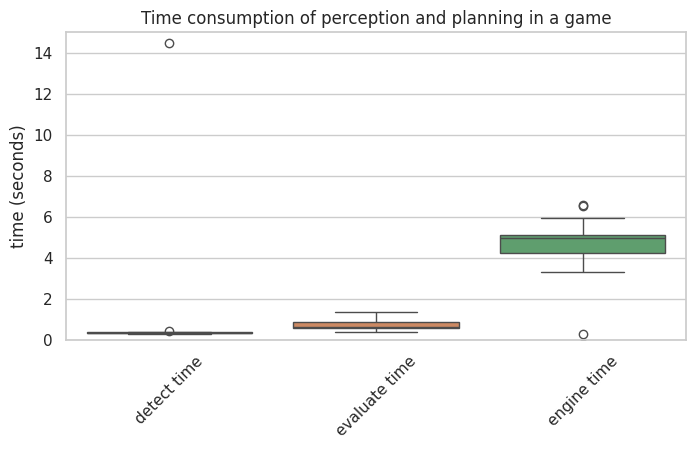

In [15]:
# Plot statistics for numeric columns
numeric_cols = df_intime.select_dtypes(include=[np.number])
numeric_cols.columns = ['detect time', 'evaluate time', 'engine time']

# Summary statistics
sns.set(style="whitegrid")
plt.figure(figsize=(8, 4))
sns.boxplot(data=numeric_cols, showfliers = True)
plt.title("Time consumption of perception and planning in a game")
plt.xticks(rotation=45)
plt.ylim(0,15)
plt.ylabel("time (seconds)")
plt.show()

In [13]:
mean_values = numeric_cols.mean()
median_values = numeric_cols.median()
mean_values, median_values

(detect_time      4.037143
 evaluate_time    0.691461
 engine_time           NaN
 dtype: float64,
 detect_time      0.392926
 evaluate_time    0.654091
 engine_time           NaN
 dtype: float64)